In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp, t
%matplotlib inline

Two tailed t-test

$$H_0: \mu = \mu_0$$
$$H_1: \mu \ne \mu_0$$

In [35]:
sample = [3,5,4,6,3,2,3,4,5,2,5]
mu_0 = 3

ttest_1samp(sample, mu_0)

Ttest_1sampResult(statistic=2.04334474133925, pvalue=0.06826435765193688)

In [32]:
# t score
t_obs = (np.mean(sample) - mu_0) / np.std(sample,ddof=1) * np.sqrt(len(sample))
t_obs

2.04334474133925

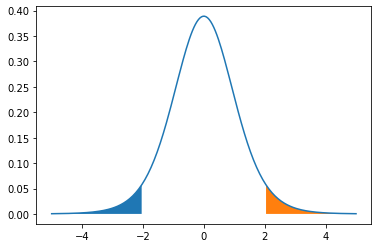

In [33]:
T = t(df=len(sample)-1)
x = np.linspace(-5,5,200)
plt.plot(x,T.pdf(x))
x_left = np.linspace(-5, -t_obs, 200)
x_right = np.linspace(t_obs, 5, 200)

plt.fill_between(x_left, T.pdf(x_left))
plt.fill_between(x_right, T.pdf(x_right))

In [34]:
T.cdf(-t_obs)*2

0.06826435765193688

Use simulations to test t-test

In [55]:
sample_size = 3
iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0) # expected value is 0
    
    if pvalue < significance_level:
        fp_counter = fp_counter + 1
        
print(fp_counter / iterations)

0.05


In [89]:
"""
Let me use from negative one to one just to preserve population mean, 
exact population mean, equals to zero 
and the other parts of this program they are the same as before. 

With sample size=3
We see that false-positive rate in this case is larger than five percent. 
The difference is relatively large. we have large false positive rate. 
It means that if we apply this T test to some data that came from not normal 
but a uniform distribution and we have very small samples, 
the size of assemble is three elements, then it is possible 
that your T test is too optimistic that it allows you to reject new hypothesis more often than it should do. 
"""
sample_size = 3
"""
With sample size=10
it's much closer to significance_level
"""
sample_size = 10
"""
With sample size=50
it's pretty in good correspondence to the significance level.

This happens and this is due to central limit theorem 
that says that it does not depend on the distribution of initial random variable. 

The distribution of i is sample mean is approximately normal and the larger sample size, 
the better this approximation. 

Then we can say that the corresponding t-statistics is approximately distributed 
according to the corresponding t-distribution and everything works as expected. 
"""
sample_size = 50

iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range(iterations):
    sample = np.random.uniform(low=-1, high=1, size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0) # expected value is 0
    
    if pvalue < significance_level:
        fp_counter = fp_counter + 1
        
print(fp_counter / iterations)

0.048


In [96]:
sample_size = 50
sample_size = 500 # larger sample size, lead to better outcome (closer to significance level)

iterations = 10000
significance_level = 0.05
fp_counter = 0
population = [2,3,4,1,2,4.4,3.2,5.1,6.3] # it's close to significance level
population = [2,3,4,1,2,4.4,3.2,5.1,6.3,10000] # not close to significance level due to abnormal item in population

for i in range(iterations):
    sample = np.random.choice(population, size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, np.mean(population)) # expected value is 0
    
    if pvalue < significance_level:
        fp_counter = fp_counter + 1
        
print(fp_counter / iterations)

0.0533



One tailed t-test

$$H_0: \mu = \mu_0$$
$$H_1: \mu \ge \mu_0$$

In [58]:
sample_size = 3
iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range(iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0)
    
    pvalue = pvalue / 2 # one tailed
    
    if t_stat > 0 and pvalue < significance_level:
        fp_counter = fp_counter + 1
        
# this number should be close to significance_level, due to randomness, and uniform distribution
print(fp_counter / iterations)

0.0505


Assume that you perform 1-sample t-test with alternative $\mu > \mu_0$ and obtain t-statistics equal to 3. Sample size is 5. Find p-value. Use definition of p-value and function scipy.stats.t.cdf to find corresponding probability. Note that parameter df (degrees of freedom) has to be equal to sample size minus 1. Enter numeric value with 3 digits after the decimal point.

In [106]:
t_stat = 3
1-t.cdf(t_stat, df=4)

0.019970984035859396

Assume that you perform 1-sample t-test with alternative $\mu > \mu_0$ and obtain t-statistics equal to -3. Sample size is 5. Find p-value. Enter numeric value with 2 digits after the decimal point.

_note: -3 and test on one tail_

In [105]:
t_stat = -3
1-t.cdf(t_stat, df=4)

0.9800290159641406

Assume that you perform 1-sample t-test with alternative $\mu \ne \mu_0$ and obtain t-statistics equal to -3. Find p-value. Enter numeric value with 3 digits after the decimal point.

In [107]:
t_stat = -3
t.cdf(t_stat, df=4)*2

0.03994196807171883

In [112]:
sample = [165, 170, 175, 180, 185, 185, 190, 195, 200, 210]

print(np.mean(sample))
# return t statistic and two tailed p value
t_stat, pvalue = ttest_1samp(sample, 175)

t_stat, pvalue

185.5


(2.400108850942297, 0.039890766746082586)

In [4]:
t_score = 2.076923076923078

1-t.cdf(t_score, df = 18)

0.026201003203565998

In [13]:
sample = [11,14,15,14,14]
sample = [8,12,10,12,9]

t_stat, pvalue = ttest_1samp(sample, 12)

t_stat, 1-pvalue/2

(-2.250000000000001, 0.9561774117483027)

we could say   
"(not) statistically siginificant"  
"plausible explained by random fluke  
"reject null hypothesis"  
"not enough data"  

could not say  
"definitely"  
"must"  

when mean is less/greater than population mean,   
we can conclude without calculating p-value   
if we are only interested on the other side of the tail  